# Linear Algebra for Data science

# Chapter 11

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from time import time

plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
# Fake data for courses & happiness relationship

numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

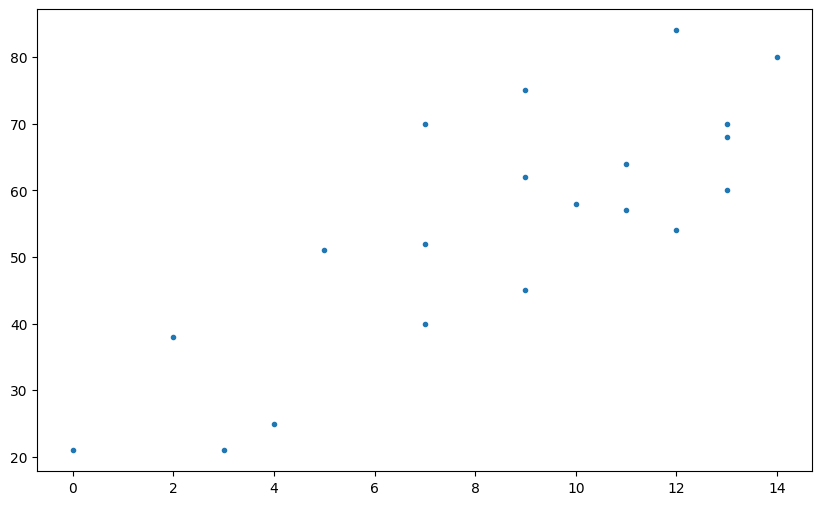

In [3]:
plt.plot(numcourses, happiness, '.')

In [4]:
X = sm.add_constant(numcourses)
Y = happiness

In [5]:
model = sm.OLS(Y,X)

In [6]:
results = model.fit()
results.params

array([23.13033815,  3.69820606])

In [7]:
np.polyfit(numcourses,happiness, deg=1)

array([ 3.69820606, 23.13033815])

In [8]:
xseq = np.linspace(0, 14, num=100)

b1, b0 = np.polyfit(numcourses,happiness, deg=1)

yseq = b0 + b1 * xseq

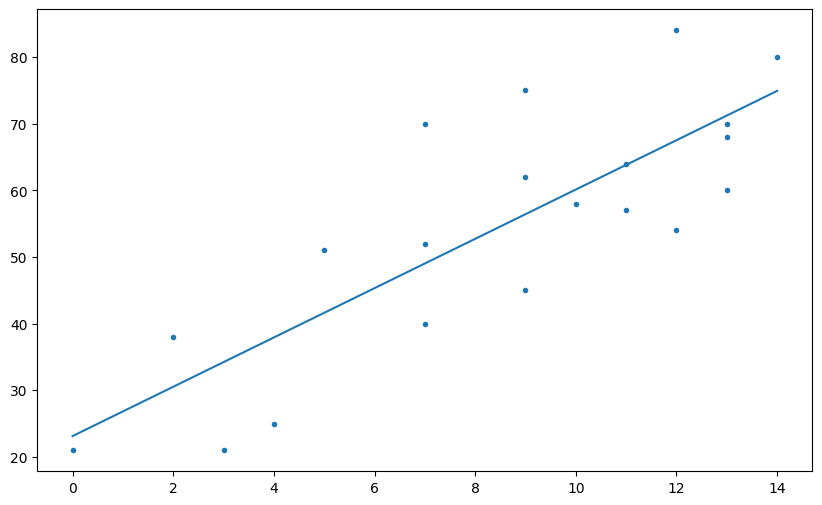

In [9]:
plt.plot(numcourses, happiness, '.')
plt.plot(xseq, yseq, 'C0')

In [10]:
# Now let's do the same algebra-style:

A = np.array([[1]*len(numcourses), numcourses]).T
A

array([[ 1, 13],
       [ 1,  4],
       [ 1, 12],
       [ 1,  3],
       [ 1, 14],
       [ 1, 13],
       [ 1, 12],
       [ 1,  9],
       [ 1, 11],
       [ 1,  7],
       [ 1, 13],
       [ 1, 11],
       [ 1,  9],
       [ 1,  2],
       [ 1,  5],
       [ 1,  7],
       [ 1, 10],
       [ 1,  0],
       [ 1,  9],
       [ 1,  7]])

In [11]:
beta = np.linalg.inv(A.T @ A) @ A.T @ happiness
beta

array([23.13033815,  3.69820606])

## Exercise 11.1

In [12]:
b1, b0 = np.polyfit(numcourses,happiness, deg=1)

predictions = np.array([b0 + b1*x for x in numcourses])

errors = np.array([(y - (b0 + b1*x)) for x,y in zip(numcourses, happiness)])

In [13]:
np.sum((predictions - errors)**2)

66455.00000000009

In [14]:
rmse(happiness, predictions)

10.479180517641677

In [15]:
(((errors**2).sum() / len(happiness)))**0.5

10.479180517641677

In [16]:
errors.mean(), errors.var()

(-1.6342482922482303e-14, 109.81322432132086)

In [17]:
np.mean(errors)

-1.6342482922482303e-14

In [18]:
errors @ predictions #> 1.9698259689533206e-11
# close enough to zero

-1.9698259689533206e-11

In [19]:
np.corrcoef(errors, predictions)

array([[ 1.00000000e+00, -8.01795814e-16],
       [-8.01795814e-16,  1.00000000e+00]])

## Exercise 11.2

Prove that vector of errors is ortogonal to the subspace of matrix

In [20]:
# Illustration:

numcourses @ errors

-3.339550858072471e-12

Analytical prove

the intuition behind that is simple. If

$$ A\beta = Y + \epsilon $$

than epsilon is exactly the measure of declination of Y from the A-space, hence it would be ortogonal to it *Would it though?*

But to prove it more rigorously: (*I failed to prove that myself but found the prove there: https://math.stackexchange.com/questions/3456100/proving-that-error-vector-to-least-squares-solution-is-orthogonal-to-the-columns*)

$$A\beta = Y + \epsilon <=> \epsilon = A\beta - Y;$$

We should prove that 

$$ A^T\epsilon=0 <=> A^T(A\beta - Y) = 0 $$

Which is true beacuse

$$ A^T(A\beta - Y) = A^TA\beta - A^TY = A^TA((A^TA)^{-1}A^TY) - A^TY = (A^TA)(A^TA)^{-1}(A^TY) - A^TY = IA^TY - A^TY = \textbf{0}$$

**EDIT: Actually, this is not correct. Formula**

$$ \beta = A^TA((A^TA)^{-1}A^TY) $$

**relies on the fact that**
$$A^T\epsilon = 0$$

**That's why we need another way to prove that**

**EDIT2: On the second read, the whole thing is kinda explained in the chapter**

## Exercise 11.3

In [21]:
#first, let's have a more intresting case:

a0 = 2
a1 = 2.343


x = np.random.uniform(low=0, high=100, size=50)

In [22]:
x.var()

733.4044142182003

In [23]:
y = [i * a1 + a0 + np.random.randn() * 2*x.var()**0.5 for i in x]

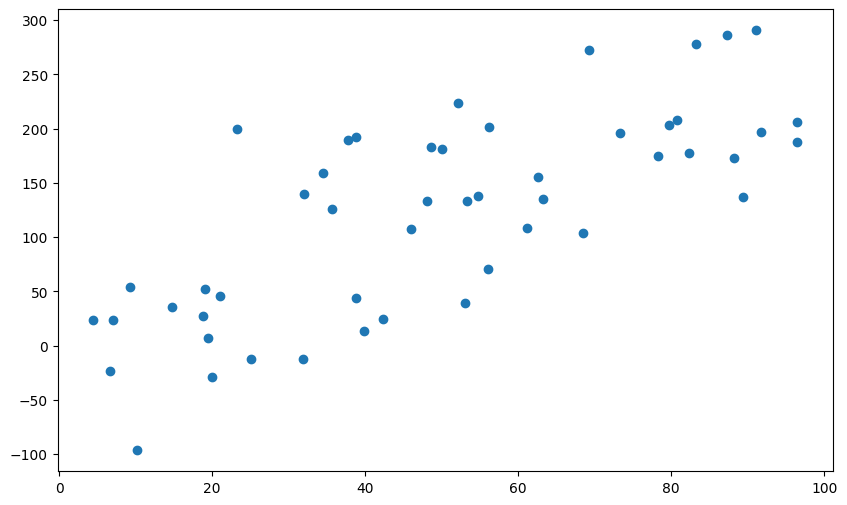

In [24]:
plt.plot(x, y, 'o')

In [25]:
# Not bad

# Let's check correlation

np.corrcoef(y,x)

array([[1.        , 0.74861422],
       [0.74861422, 1.        ]])

In [26]:
X = sm.add_constant(x)
Y = y

In [27]:
model = sm.OLS(Y, X)
result = model.fit()
result.params

array([-4.62872393,  2.53538093])

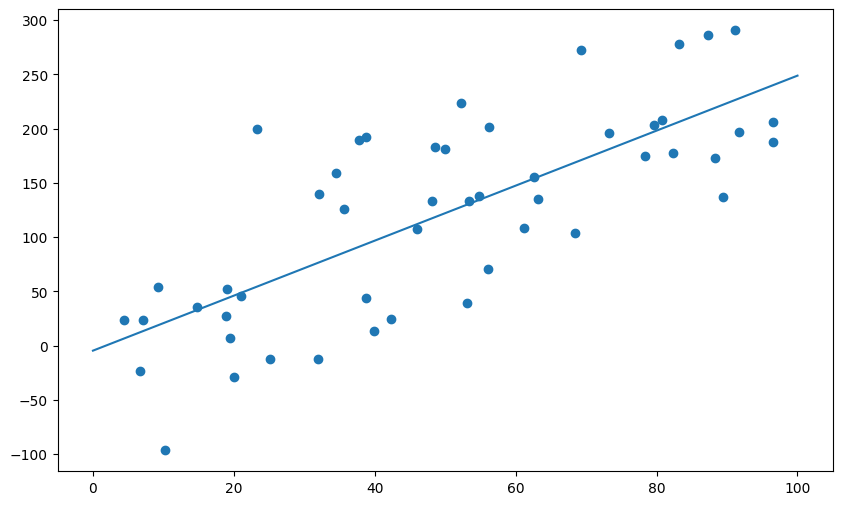

In [28]:
plt.plot(x, y, 'o')

xseq = np.linspace(0,100,100)
yseq = sm.add_constant(xseq) @ result.params
plt.plot(xseq, yseq, 'C0')

In [29]:
# Now to the exercise. 

#1) First (basic) way

start = time()
a0, a1 = np.linalg.inv(X.T @ X) @ X.T @ Y
end=time()

print(f'coefs are: {a0, a1}, execution time is {end-start}')

coefs are: (-4.6287239337843085, 2.5353809273644883), execution time is 0.0026712417602539062


In [30]:
#2) QR-decomposition way:

start = time()
q,r = np.linalg.qr(X)
b0, b1 = np.linalg.inv(r) @ q.T @ Y
end=time()

print(f'coefs are: {a0, a1}, execution time is {end-start}')

coefs are: (-4.6287239337843085, 2.5353809273644883), execution time is 0.0040128231048583984


## Exercise 11.4

In [31]:
happiness_2 = happiness.copy()
happiness_3 = happiness.copy()

In [32]:
happiness_2[0] = 170
happiness_3[-1] = 170

In [33]:
X = sm.add_constant(numcourses)

In [34]:

model_2 = sm.OLS(happiness_2, X)
results_2 = model_2.fit()
results_2.params

array([16.04984918,  5.11112875])

In [35]:
model_3 = sm.OLS(happiness_3, X)
results_3 = model_3.fit()
results_3.params

array([32.33814891,  3.20606445])

In [36]:
model = sm.OLS(happiness, X)
results = model.fit()
results.params

array([23.13033815,  3.69820606])

In [37]:
predicted_happiness = X @ results.params

In [38]:
predicted_happiness_2 = X @ results_2.params

In [39]:
predicted_happiness_3 = X @ results_3.params

Text(0.5, 1.0, 'SSE = 2772.55')

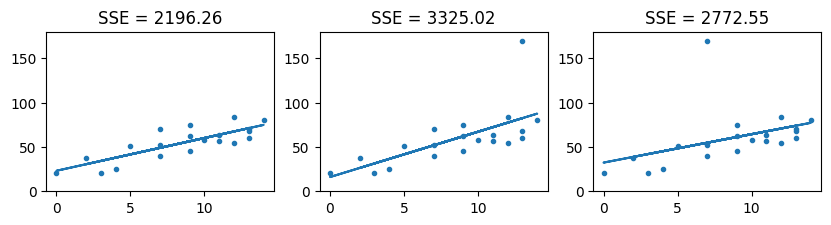

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.plot(numcourses, happiness, '.')
ax1.plot(numcourses, predicted_happiness, 'C0')
ax1.set_ylim(0,180)
ax1.set_box_aspect(.7)
title_1 = f'SSE = {np.sum((happiness - predicted_happiness)**2):.2f}'
ax1.set_title(title_1)


ax2.plot(numcourses, happiness_2, '.')
ax2.plot(numcourses, predicted_happiness_2, 'C0')
ax2.set_ylim(0,180)
ax2.set_box_aspect(.7)
title_2 = f'SSE = {np.sum((happiness - predicted_happiness_2)**2):.2f}'
ax2.set_title(title_2)


ax3.plot(numcourses, happiness_3, '.')
ax3.plot(numcourses, predicted_happiness_3, 'C0')
ax3.set_ylim(0,180)
ax3.set_box_aspect(.7)
title_3 = f'SSE = {np.sum((happiness - predicted_happiness_3)**2):.2f}'
ax3.set_title(title_3)



## Exercise 11.5

In [41]:
#Skipped